In [48]:
import pandas as pd
import matplotlib.pyplot as plt 

In [27]:
df=pd.read_csv('Dados/data_tratado.csv', sep=";")  

In [28]:
df.loc[:,'DT_MEDICAO'] =  pd.to_datetime(df.loc[:,'DT_MEDICAO'], format='%Y-%m-%d')

In [29]:
#criando a coluna mês
df.loc[:,'MES'] = df.loc[:,'DT_MEDICAO'].dt.month

In [31]:
from funcoes_eda import correlacao

### Correlacao

In [32]:
# Faz a vorrelação de Sperman e Person, não há muita diferença apenas a chuva que possui uma correlação negativa mais forte
# que a de Pearson.

#VEN_DIR utilizar o vento também, pois muito vendo pode representar pouca nuvem.
#VEN_RAJ utilizar o vento também, pois muito vendo pode representar pouca nuvem.
correlacao(df)

spearman


UMD_MIN      -0.942606
UMD_INS      -0.942154
UMD_MAX      -0.930068
CHUVA        -0.498300
PRE_INS      -0.319421
PRE_MIN      -0.304680
PRE_MAX      -0.301470
PTO_MIN      -0.213505
PTO_INS      -0.121161
MES          -0.044875
PTO_MAX      -0.018208
VEN_VEL       0.487044
VEN_RAJ       0.551150
HORA          0.579599
VEN_DIR       0.626859
TEM_SEN       0.645907
TEM_MIN       0.748881
TEM_INS       0.779086
TEM_MAX       0.792269
HR_MEDICAO    0.882861
RAD           1.000000
Name: RAD, dtype: float64

pearson


UMD_INS      -0.956662
UMD_MIN      -0.953529
UMD_MAX      -0.945781
PRE_INS      -0.352898
PRE_MIN      -0.333581
PTO_MIN      -0.332240
PRE_MAX      -0.328450
CHUVA        -0.272705
PTO_INS      -0.239215
PTO_MAX      -0.120136
MES          -0.034893
VEN_VEL       0.453167
VEN_RAJ       0.496670
HORA          0.546398
VEN_DIR       0.685057
TEM_SEN       0.713129
TEM_MIN       0.811416
HR_MEDICAO    0.813336
TEM_INS       0.836145
TEM_MAX       0.840922
RAD           1.000000
Name: RAD, dtype: float64

## Verifica a soma da Radiação, Chuva e Umidade em função dos meses

In [42]:
import seaborn as sns

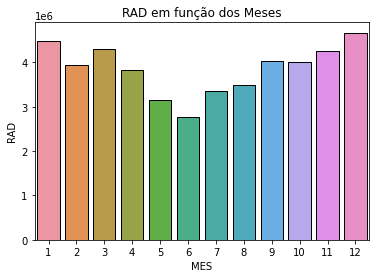

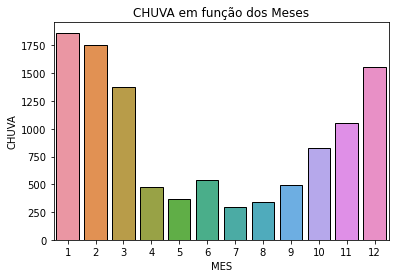

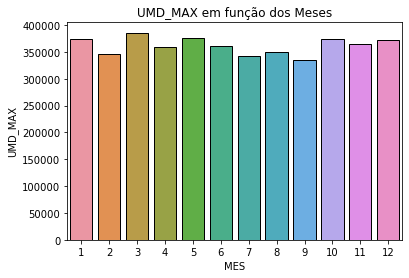

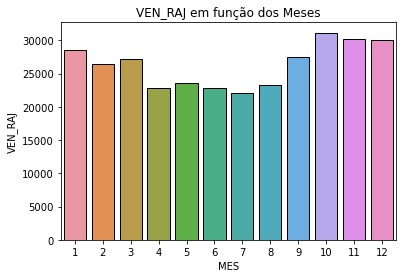

In [57]:
cols=['RAD', 'CHUVA', 'UMD_MAX', 'VEN_RAJ']
df['RAD'] = df['RAD'].astype(float)
for col in cols:
    sns.barplot(x='MES', y=col, data=df, estimator=sum, ec='black', ci=None).set_title(f'{col} em função dos Meses')
    plt.show()

### Histograma da Radiação, Chuva e Umidade em função dos meses

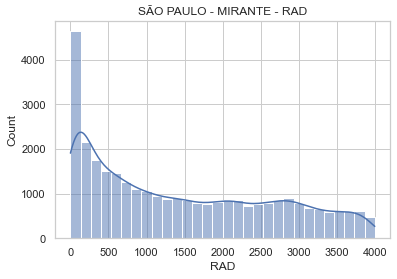

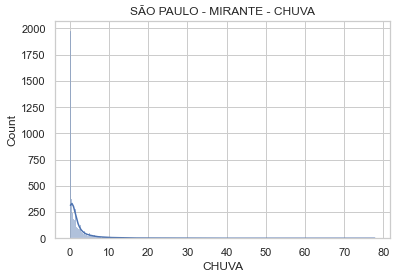

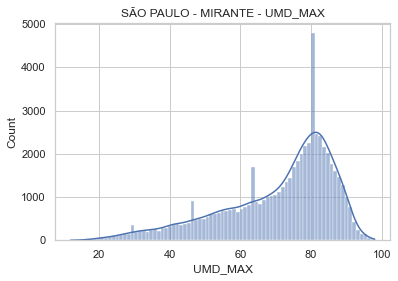

In [295]:
cols=['RAD', 'CHUVA', 'UMD_MAX']
EDA_HIST(df, cols)

### Plot Radiação, Chuva e Umidade no dia

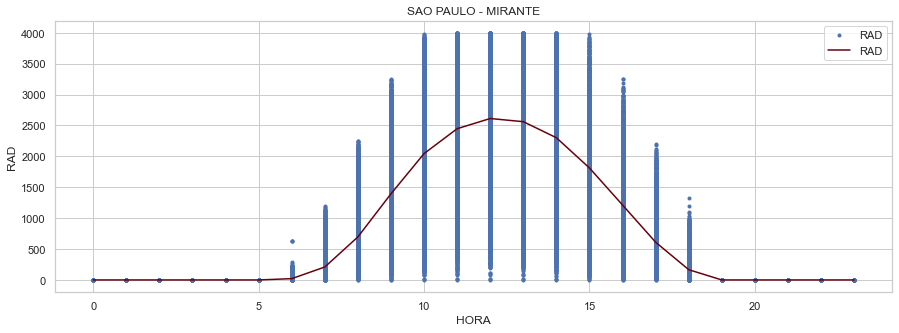

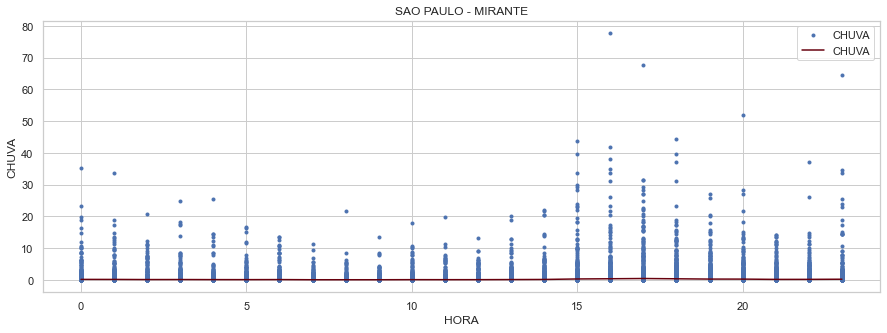

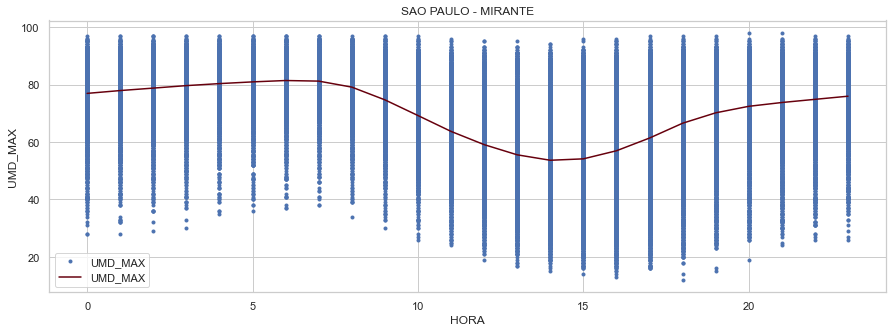

In [296]:
cols=['RAD', 'CHUVA', 'UMD_MAX']
EDA_PLOT(df, cols)

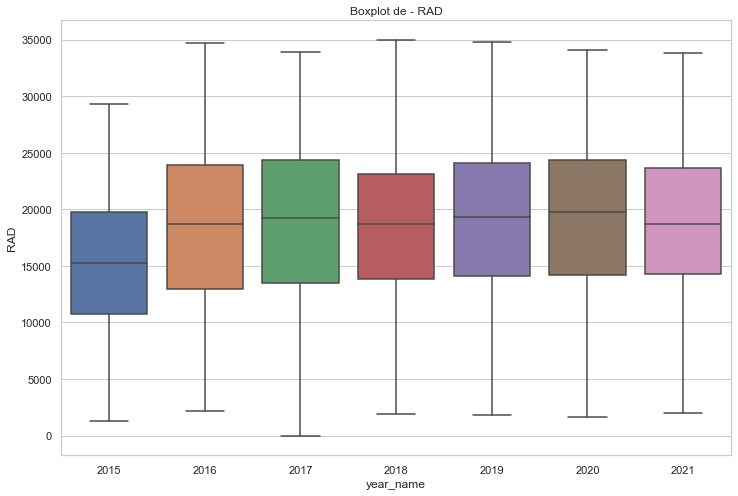

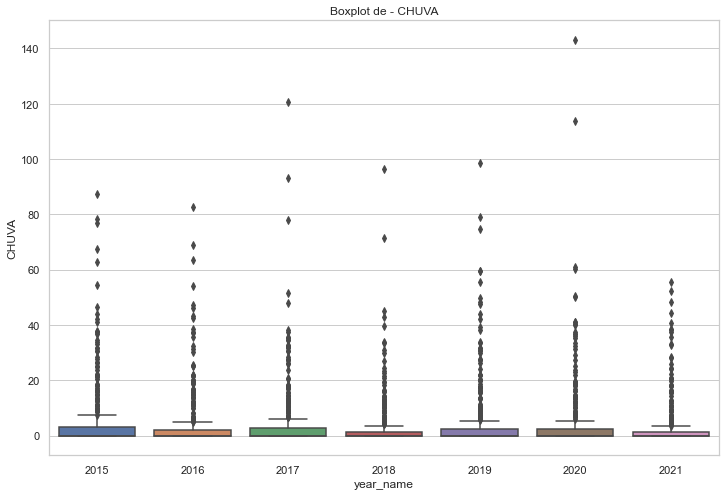

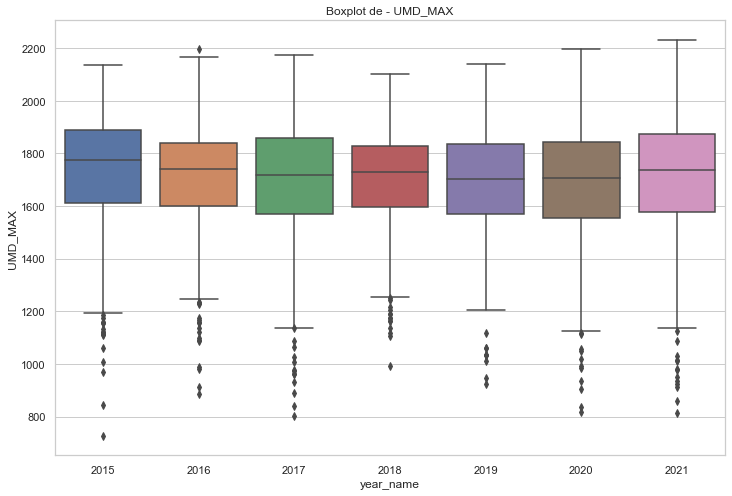

In [297]:
cols=['RAD', 'CHUVA', 'UMD_MAX']
EDA_boxplot(df, cols)
#A partir de 2015 deu uma subida, e depois mantem aparentemente uma estabilidade

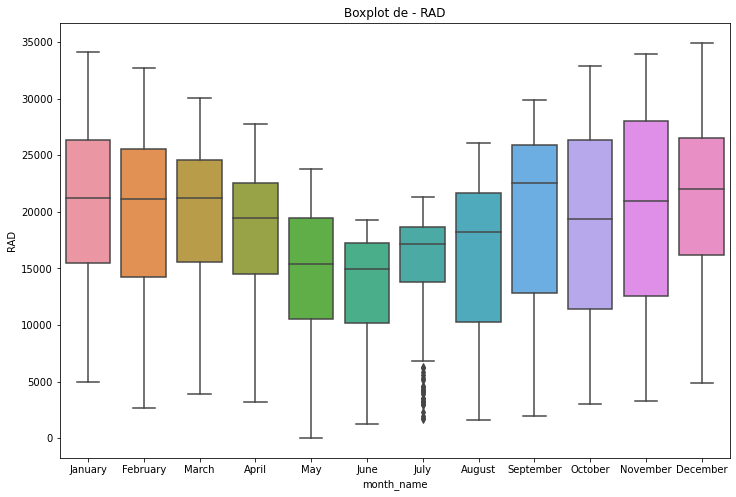

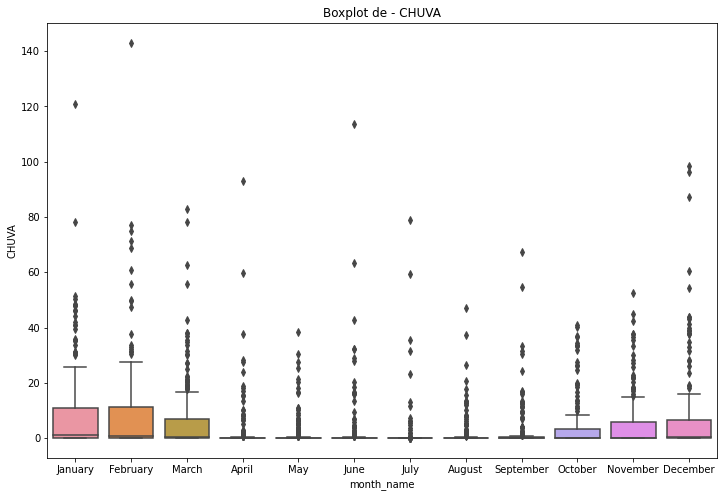

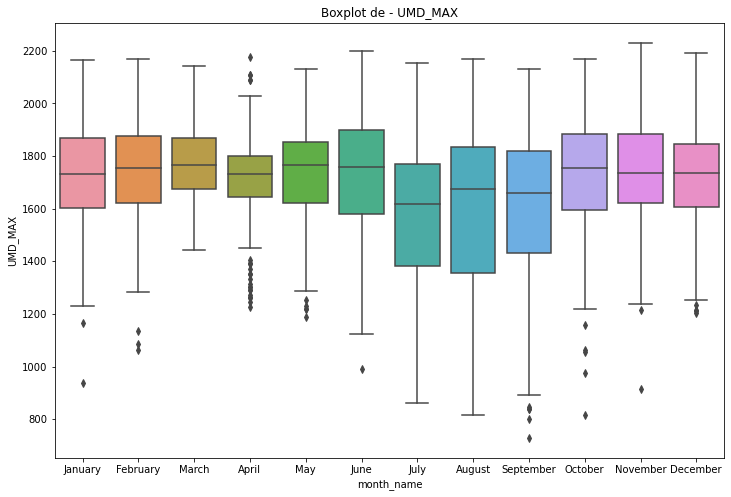

In [64]:
cols=['RAD', 'CHUVA', 'UMD_MAX']
ts=df[['DT_MEDICAO','RAD','UMD_MAX','CHUVA']]
ts=ts.groupby('DT_MEDICAO')['RAD','UMD_MAX','CHUVA'].sum()
ts['month_name'] = ts.index.month_name()
for col in cols:
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(y = ts[col], x = ts['month_name'], ax = ax).set_title(f'Boxplot de - {col}')


In [65]:
df_estacoes = df.loc[df['DT_MEDICAO'] >= '2015-3-1']

In [66]:
ts_estacoes=df_estacoes[['DT_MEDICAO','RAD','UMD_MAX','CHUVA']]
ts_estacoes=ts_estacoes.groupby('DT_MEDICAO')['RAD','UMD_MAX','CHUVA'].sum()

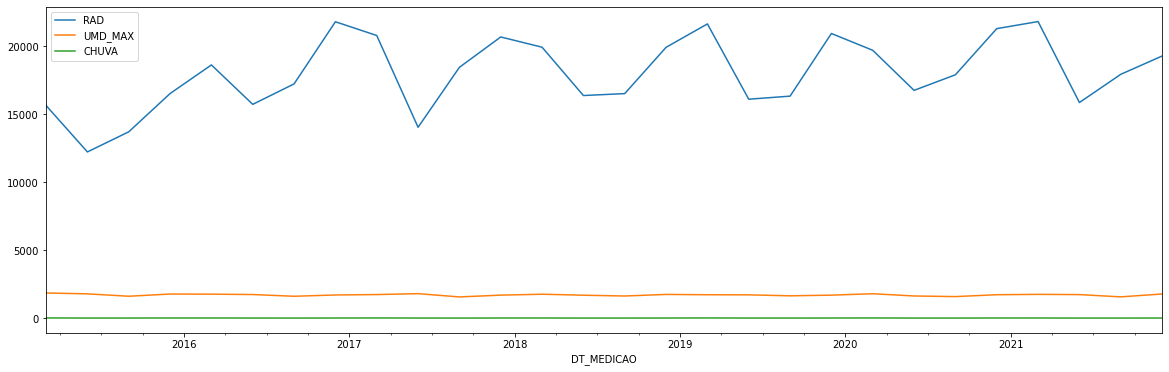

In [67]:
#A Cada mês
ts_estacoes.resample('3M').mean().plot(figsize=(20, 6));

In [273]:
#histograma por mês da radiação
#meses = [1,2,3,4,5,6,7,8,9,10,11,12]
#for x in meses:
    #filtro_mes = "MES == " + str(x)
    #df_mes = df.query(filtro_mes)
    #sns.histplot(data = df_mes['RAD'].loc[(df_mes['RAD']!=0)], kde = True).set_title('Mês ' + str(x));
    #plt.show()

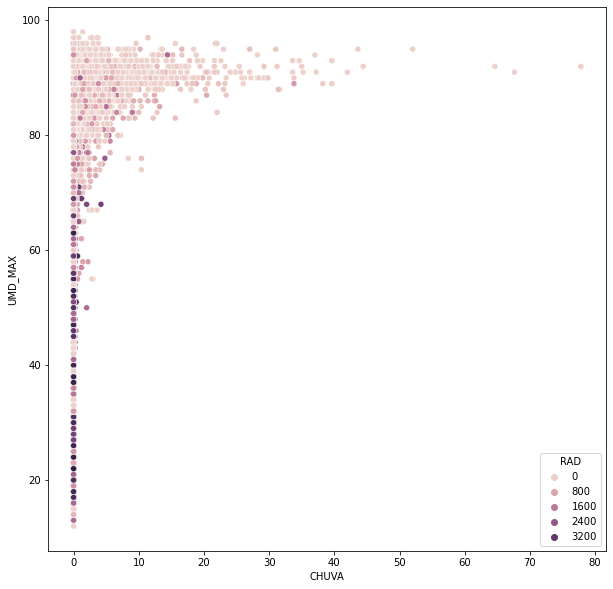

In [19]:
#Possivel verificar que quanto mairo a chuva e a umidade masi fraca a radiação
plt.figure(figsize=(10,10))
sns.scatterplot(x= df.CHUVA, y= df.UMD_MAX, hue = df.RAD);
plt.show()